## Example 2
**Model**: n-step translocation with two-step dissociation

**Laplace transform of f(t)**:
$$F(s) = \dfrac{A}{1+nr} \Bigg[ \dfrac{1}{s+k_{c}} \bigg[ 1+\dfrac{k_{t}r}{s+k_{d}} \bigg(1- \bigg( \dfrac{k_{t}}{s+k_{t}+k_{d}}\bigg)^{n} \bigg) \bigg] \bigg[ 1+C \dfrac{k_{c}}{s+k_{end}} \bigg] \Bigg]$$

**Simulation parameters**:
* Amplitudes $A$ = -1
* Number of steps $n$ = 5, 8, 11, 14
* Stepping rate $k_{t}$ = 40
* Dissociation rate $k_{d}$ = 0.5
* $k_{c}$ = 11
* $k_{end}$ = 2
* $r$ = 1.35
* $C$ = 0.05
* Time interval t = 0, ..., 2 sec
* Random signal noise $\sigma$ = 0.01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from globalfit import models

In [2]:
# parameters used for simulations
# kt, kd, kc, kend, r, C are global parameters
kt = 40.0; kd = 0.5; kc = 11.; kend = 2.; r = 1.35; C = 0.05
# A and n
A = np.array([-1., -1., -1., -1.])
n = np.array([5., 8., 11., 14.])
# step-size
m = 4
# DNA lengths (nt)
L = m * n
noise = 0.01
# 2 sec 200 points
t = np.linspace(0.004, 2, 200)

# simulate toy data
data = np.zeros((200,5))
data[:,0] = t
np.random.seed(42)
for i in range(4):
    data[:,i+1] = models['nstep_kckend'](t, A[i], n[i], kt, kd, kc, kend, r, C) + noise * np.random.randn(len(t))

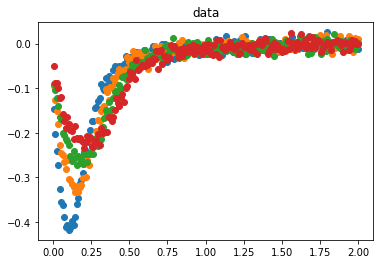

In [3]:
# plot the data
plt.figure(figsize=(6,4))
plt.plot(t, data[:,1:], 'o')
plt.title('data')
plt.show()

In [4]:
np.savetxt('example2/data.csv', data, delimiter=',')

Now we will fit our simulated data using globalfit
### Data fitting (float all parameters)

User-built models:
1. nstep
2. nstep_kckend
3. nstep_kckend_talbot
4. nstep_talbot


Type the name of your model:  nstep_kckend
DATA folder name:  example2


MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


GLOBAL parameters (comma separated):  kt, kd, kc, kend, r, C


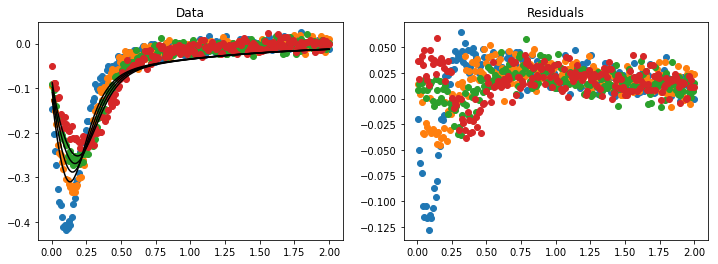

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [5]:
# import GlobalModel
from globalfit import GlobalModel

# start nstep_kckend model
# remember our simulated data is stored in example2 folder
# kt, kd, kc, kend, r, C will be global parameters
# initial guesses are read from params.gss file
float_all = GlobalModel()

MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


FIXED parameters (comma separated):  


Fitting ...
Parameters fit values:
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
A_1       -1.018     -inf      inf  0.05158     True     None     None
A_2        -1.02     -inf      inf  0.04678     True     None     None
A_3       -1.044     -inf      inf  0.04438     True     None     None
A_4       -1.064     -inf      inf  0.04587     True     None     None
C_1      0.05562        0      inf 0.007875     True     None     None
C_2      0.05562     -inf      inf 0.007875    False      C_1     None
C_3      0.05562     -inf      inf 0.007875    False      C_1     None
C_4      0.05562     -inf      inf 0.007875    False      C_1     None
kc_1       10.88        0      inf   0.9526     True     None     None
kc_2       10.88     -inf      inf   0.9526    False     kc_1     None
kc_3       10.88     -inf      inf   0.9526    False     kc_1     None
kc_4       10.88     -inf      inf   0.9526    False     kc_1     None
kd_1      0.9653     -inf      inf   0.3

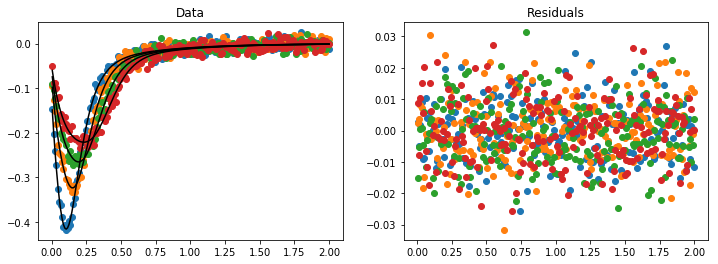

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [6]:
# float all parameters
float_all.fit()

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------
MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


FIXED parameters (comma separated):  


Fitting ...
Parameters fit values:
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
A_1       -1.018     -inf      inf  0.05155     True     None     None
A_2        -1.02     -inf      inf  0.04676     True     None     None
A_3       -1.044     -inf      inf  0.04437     True     None     None
A_4       -1.064     -inf      inf  0.04586     True     None     None
C_1      0.05564        0      inf 0.007877     True     None     None
C_2      0.05564     -inf      inf 0.007877    False      C_1     None
C_3      0.05564     -inf      inf 0.007877    False      C_1     None
C_4      0.05564     -inf      inf 0.007877    False      C_1     None
kc_1       10.88        0      inf    0.952     True     None     None
kc_2       10.88     -inf      inf    0.952    False     kc_1     None
kc_3       10.88     -inf      inf    0.952    False     kc_1     None
kc_4       10.88     -inf      inf    0.952    False     kc_1     None
kd_1      0.9631     -inf      inf   0.3

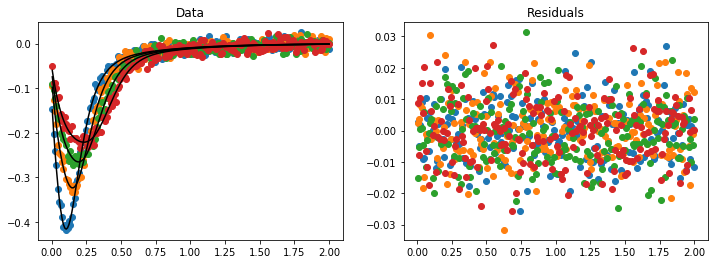

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [7]:
# write and fit again
float_all.write()
float_all.fit()

### Analyze results

In [8]:
# retrieve fit results
n_fit = np.array([float_all.params['n_{}'.format(i+1)].value for i in range(4)])
kt_fit = float_all.params['kt_1'].value
kt_err = float_all.params['kt_1'].stderr

from scipy.stats import linregress
m_fit, d_fit, r_value, p_value, std_err = linregress(n_fit,L)

print('kt_fit = {:.2f}±{:.2f} (kt = {})'.format(kt_fit, kt_err, kt))
print('m_fit = {:.2f}±{:.2f} (m = {})'.format(m_fit, std_err, m))
print('m_fit * kt_fit = {:.1f}±{:.1f} (m*kt = {})'.format(m_fit*kt_fit, (kt_err/kt_fit+std_err/m_fit)*m_fit*kt_fit, m*kt))
print('kd_fit = {:.2f}±{:.2f} (kd = {})'.format(float_all.params['kd_1'].value, float_all.params['kd_1'].stderr, kd))
print('kc_fit = {:.2f}±{:.2f} (kc = {})'.format(float_all.params['kc_1'].value, float_all.params['kc_1'].stderr, kc))
print('kend_fit = {:.2f}±{:.2f} (kend = {})'.format(float_all.params['kend_1'].value, float_all.params['kend_1'].stderr, kend))
print('r_fit = {:.2f}±{:.2f} (r = {})'.format(float_all.params['r_1'].value, float_all.params['r_1'].stderr, r))
print('C_fit = {:.2f}±{:.2f} (C = {})'.format(float_all.params['C_1'].value, float_all.params['C_1'].stderr, C))

kt_fit = 49.89±7.43 (kt = 40.0)
m_fit = 3.04±0.02 (m = 4)
m_fit * kt_fit = 151.5±23.5 (m*kt = 160.0)
kd_fit = 0.97±0.35 (kd = 0.5)
kc_fit = 10.88±0.95 (kc = 11.0)
kend_fit = 2.09±0.23 (kend = 2.0)
r_fit = 1.07±0.20 (r = 1.35)
C_fit = 0.06±0.01 (C = 0.05)


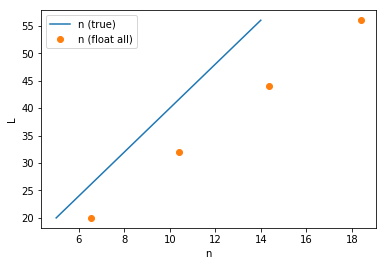

In [9]:
# plot
plt.figure(figsize=(6,4))
plt.plot(n, L, '-', label='n (true)')
plt.plot(n_fit, L, 'o', label='n (float all)')
plt.ylabel('L')
plt.xlabel('n')
plt.legend()
plt.show()

Display correlations between parameters using .report()

In [10]:
float_all.report()

[[Variables]]
    A_1:    -1.01810572 +/- 0.05158016 (5.07%) (init = -0.8)
    A_2:    -1.01981694 +/- 0.04678084 (4.59%) (init = -0.8)
    A_3:    -1.04443884 +/- 0.04437995 (4.25%) (init = -0.8)
    A_4:    -1.06437872 +/- 0.04586605 (4.31%) (init = -0.8)
    n_1:     6.53494522 +/- 0.88145437 (13.49%) (init = 6)
    n_2:     10.4138828 +/- 1.48801133 (14.29%) (init = 7)
    n_3:     14.3576678 +/- 2.16555962 (15.08%) (init = 8)
    n_4:     18.3881357 +/- 2.91118424 (15.83%) (init = 9)
    kt_1:    49.8908051 +/- 7.42857667 (14.89%) (init = 35)
    kt_2:    49.8908051 +/- 7.42857666 (14.89%) == 'kt_1'
    kt_3:    49.8908051 +/- 7.42857666 (14.89%) == 'kt_1'
    kt_4:    49.8908051 +/- 7.42857666 (14.89%) == 'kt_1'
    kd_1:    0.96534865 +/- 0.35226800 (36.49%) (init = 0.5)
    kd_2:    0.96534865 +/- 0.35226800 (36.49%) == 'kd_1'
    kd_3:    0.96534865 +/- 0.35226800 (36.49%) == 'kd_1'
    kd_4:    0.96534865 +/- 0.35226800 (36.49%) == 'kd_1'
    kc_1:    10.8751343 +/- 0.9525907

Some parameters are a bit off which might be due to overfitting. Suppose we determined $k_{d}$ independently and we will fix it during fitting. Since there is a positive correlation between ($k_{d}$, $n$) and ($k_{d}$, $k_{t}$) we should see increase in the step-size $m$ and decrease in the stepping-rate $k_{t}$ by constraining $k_{d}$ = 0.5

First let's save our current fitting results.

In [11]:
# write and save
float_all.write()
float_all.save()

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------
Saved parameters into file: params.out
Saved simulation into file: simulation.csv
Saved residuals into file: residual.csv
----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


### Data fitting (fix kd)

User-built models:
1. nstep
2. nstep_kckend
3. nstep_kckend_talbot
4. nstep_talbot


Type the name of your model:  nstep_kckend
DATA folder name:  example2


MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


GLOBAL parameters (comma separated):  kt, kd, kc, kend, r, C


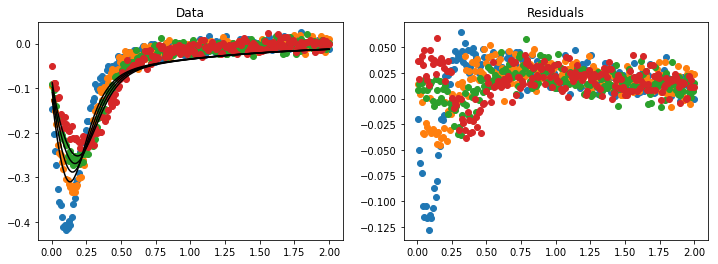

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [13]:
fix_kd = GlobalModel()

MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


FIXED parameters (comma separated):  kd


Fitting ...
Parameters fit values:
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
A_1        -1.07     -inf      inf  0.04737     True     None     None
A_2       -1.055     -inf      inf  0.04875     True     None     None
A_3       -1.061     -inf      inf  0.04992     True     None     None
A_4       -1.062     -inf      inf  0.05027     True     None     None
C_1      0.05751        0      inf 0.007155     True     None     None
C_2      0.05751     -inf      inf 0.007155    False      C_1     None
C_3      0.05751     -inf      inf 0.007155    False      C_1     None
C_4      0.05751     -inf      inf 0.007155    False      C_1     None
kc_1          12        0      inf    0.714     True     None     None
kc_2          12     -inf      inf    0.714    False     kc_1     None
kc_3          12     -inf      inf    0.714    False     kc_1     None
kc_4          12     -inf      inf    0.714    False     kc_1     None
kd_1         0.5     -inf      inf      

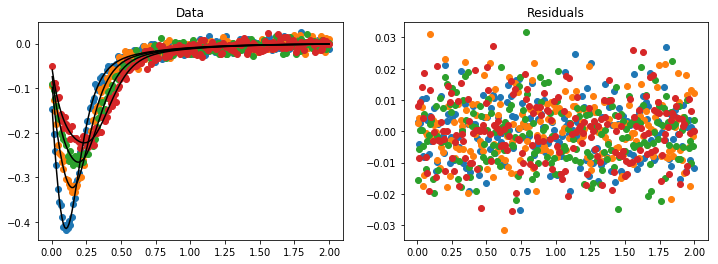

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [14]:
# fix kd
fix_kd.fit()

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------
MODEL parameters: ['A', 'n', 'kt', 'kd', 'kc', 'kend', 'r', 'C']


FIXED parameters (comma separated):  kd


Fitting ..
Parameters fit values:
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
A_1        -1.07     -inf      inf  0.04737     True     None     None
A_2       -1.055     -inf      inf  0.04875     True     None     None
A_3       -1.061     -inf      inf  0.04992     True     None     None
A_4       -1.062     -inf      inf  0.05028     True     None     None
C_1      0.05751        0      inf 0.007155     True     None     None
C_2      0.05751     -inf      inf 0.007155    False      C_1     None
C_3      0.05751     -inf      inf 0.007155    False      C_1     None
C_4      0.05751     -inf      inf 0.007155    False      C_1     None
kc_1          12        0      inf   0.7141     True     None     None
kc_2          12     -inf      inf   0.7141    False     kc_1     None
kc_3          12     -inf      inf   0.7141    False     kc_1     None
kc_4          12     -inf      inf   0.7141    False     kc_1     None
kd_1         0.5     -inf      inf       

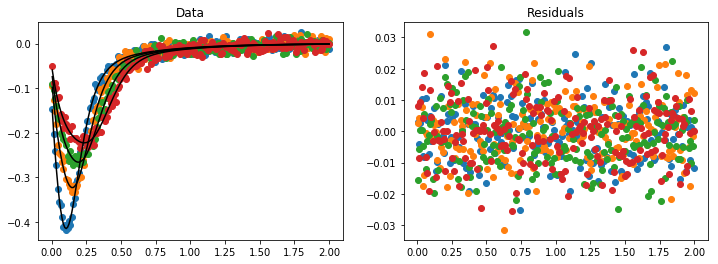

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [15]:
# write and fit again
fix_kd.write()
fix_kd.fit()

### Analyze results

In [16]:
# retrieve fit results
n_fit2 = np.array([fix_kd.params['n_{}'.format(i+1)].value for i in range(4)])
kt_fit2 = fix_kd.params['kt_1'].value
kt_err2 = fix_kd.params['kt_1'].stderr

from scipy.stats import linregress
m_fit2, d_fit2, r_value, p_value, std_err2 = linregress(n_fit2,L)

print('kt_fit = {:.2f}±{:.2f} (kt = {})'.format(kt_fit2, kt_err2, kt))
print('m_fit = {:.2f}±{:.2f} (m = {})'.format(m_fit2, std_err2, m))
print('m_fit * kt_fit = {:.1f}±{:.1f} (m*kt = {})'.format(m_fit2*kt_fit2, (kt_err2/kt_fit2+std_err2/m_fit2)*m_fit2*kt_fit2, m*kt))
print('kd_fixed = {:.2f}'.format(fix_kd.params['kd_1'].value))
print('kc_fit = {:.2f}±{:.2f} (kc = {})'.format(fix_kd.params['kc_1'].value, fix_kd.params['kc_1'].stderr, kc))
print('kend_fit = {:.2f}±{:.2f} (kend = {})'.format(fix_kd.params['kend_1'].value, fix_kd.params['kend_1'].stderr, kend))
print('r_fit = {:.2f}±{:.2f} (r = {})'.format(fix_kd.params['r_1'].value, fix_kd.params['r_1'].stderr, r))
print('C_fit = {:.2f}±{:.2f} (C = {})'.format(fix_kd.params['C_1'].value, fix_kd.params['C_1'].stderr, C))

kt_fit = 42.83±3.42 (kt = 40.0)
m_fit = 3.70±0.01 (m = 4)
m_fit * kt_fit = 158.3±12.9 (m*kt = 160.0)
kd_fixed = 0.50
kc_fit = 12.00±0.71 (kc = 11.0)
kend_fit = 2.21±0.20 (kend = 2.0)
r_fit = 1.29±0.17 (r = 1.35)
C_fit = 0.06±0.01 (C = 0.05)


Constraining kd to true value has imporved values of kt_fit and m_fit as we expected!

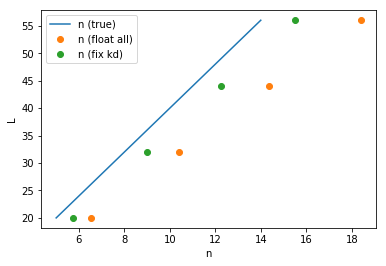

In [17]:
# plot
plt.figure(figsize=(6,4))
plt.plot(n, L, '-', label='n (true)')
plt.plot(n_fit, L, 'o', label='n (float all)')
plt.plot(n_fit2, L, 'o', label='n (fix kd)')
plt.ylabel('L')
plt.xlabel('n')
plt.legend()
plt.show()

### CONLIN
Comparing our results to Conlin program with same initial guesses.

Float all:

In [62]:
import pandas as pd

conlin_float_all = pd.read_csv('example2/conlin/params-floatall.gss', delim_whitespace=True, header=None, usecols=[1, 2], names=['param', 'conlin'])
conlin_float_all.insert(loc=2, column='globalfit', value=0)

globalfit_float_all = pd.read_csv('example2/params_all-float.out', delim_whitespace=True)
globalfit_float_all = globalfit_float_all.set_index('Name')

p_list = ['kt_1', 'kd_1', 'kc_1', 'kend_1', 'r_1', 'C_1', 'n_1', 'A_1', 'n_2', 'A_2', 'n_3', 'A_3', 'n_4', 'A_4', 'Chi2']
for i, p in enumerate(p_list):
    conlin_float_all.loc[i, 'globalfit'] = globalfit_float_all.loc[p, 'Value']
conlin_float_all

,param,conlin,globalfit
0,kt,49.424706,49.885303
1,kd,0.949122,0.965122
2,kc,10.879073,10.875525
3,kend,2.081225,2.092478
4,r,1.081539,1.070532
5,C,0.055163,0.055620
6,n1,6.479221,6.534300
7,A1,-1.018817,-1.018128
8,n2,10.313917,10.412780
9,A2,-1.020064,-1.019832


Fix kd:

In [64]:
conlin_fix_kd = pd.read_csv('example2/conlin/params-fix-kd.gss', delim_whitespace=True, header=None, usecols=[1, 2], names=['param', 'conlin'])
conlin_fix_kd.insert(loc=2, column='globalfit', value=0)

globalfit_fix_kd = pd.read_csv('example2/params_fix-kd.out', delim_whitespace=True)
globalfit_fix_kd = globalfit_fix_kd.set_index('Name')

p_list = ['kt_1', 'kd_1', 'kc_1', 'kend_1', 'r_1', 'C_1', 'n_1', 'A_1', 'n_2', 'A_2', 'n_3', 'A_3', 'n_4', 'A_4', 'Chi2']
for i, p in enumerate(p_list):
    conlin_fix_kd.loc[i, 'globalfit'] = globalfit_fix_kd.loc[p, 'Value']
conlin_fix_kd

,param,conlin,globalfit
0,kt,42.696349,42.826349
1,kd,0.500000,0.500000
2,kc,11.949594,11.996685
3,kend,2.191391,2.208703
4,r,1.289486,1.285792
5,C,0.056927,0.057514
6,n1,5.738132,5.758415
7,A1,-1.068084,-1.069825
8,n2,8.975728,9.010350
9,A2,-1.053495,-1.055163


Overall results are very similar. Globalfit has slightly lower Chi2 in the case of float all. On the other hand Conlin has slightly lower Chi2 in the case of fixed kd.

### Calculate posterior distribution (optional)
(It is very slow).
From posterior distribution you can visually see positive correlations between ($n$, $k$), ($k_{d}$, $k_{t}$), and ($k_{d}$, $n$).

It also correctly determined noise that has been added to the data.

100%|██████████| 1000/1000 [57:43<00:00,  3.46s/it]


median of posterior probability distribution
--------------------------------------------
[[Variables]]
    A_1:    -1.01554659 +/- 0.05560932 (5.48%) (init = -1.018322)
    A_2:    -1.01392029 +/- 0.05476279 (5.40%) (init = -1.019956)
    A_3:    -1.03444162 +/- 0.06447657 (6.23%) (init = -1.04449)
    A_4:    -1.04953858 +/- 0.06902040 (6.58%) (init = -1.064327)
    n_1:     6.44786062 +/- 1.12705328 (17.48%) (init = 6.531017)
    n_2:     10.1973927 +/- 1.77107459 (17.37%) (init = 10.40671)
    n_3:     14.0505609 +/- 2.41189876 (17.17%) (init = 14.34683)
    n_4:     17.9578452 +/- 3.09787615 (17.25%) (init = 18.37306)
    kt_1:    49.4005301 +/- 7.99835528 (16.19%) (init = 49.85466)
    kt_2:    49.4005301 == 'kt_1'
    kt_3:    49.4005301 == 'kt_1'
    kt_4:    49.4005301 == 'kt_1'
    kd_1:    0.73843119 +/- 0.35211090 (47.68%) (init = 0.9630931)
    kd_2:    0.73843119 == 'kd_1'
    kd_3:    0.73843119 == 'kd_1'
    kd_4:    0.73843119 == 'kd_1'
    kc_1:    11.1202204 +/- 0.86

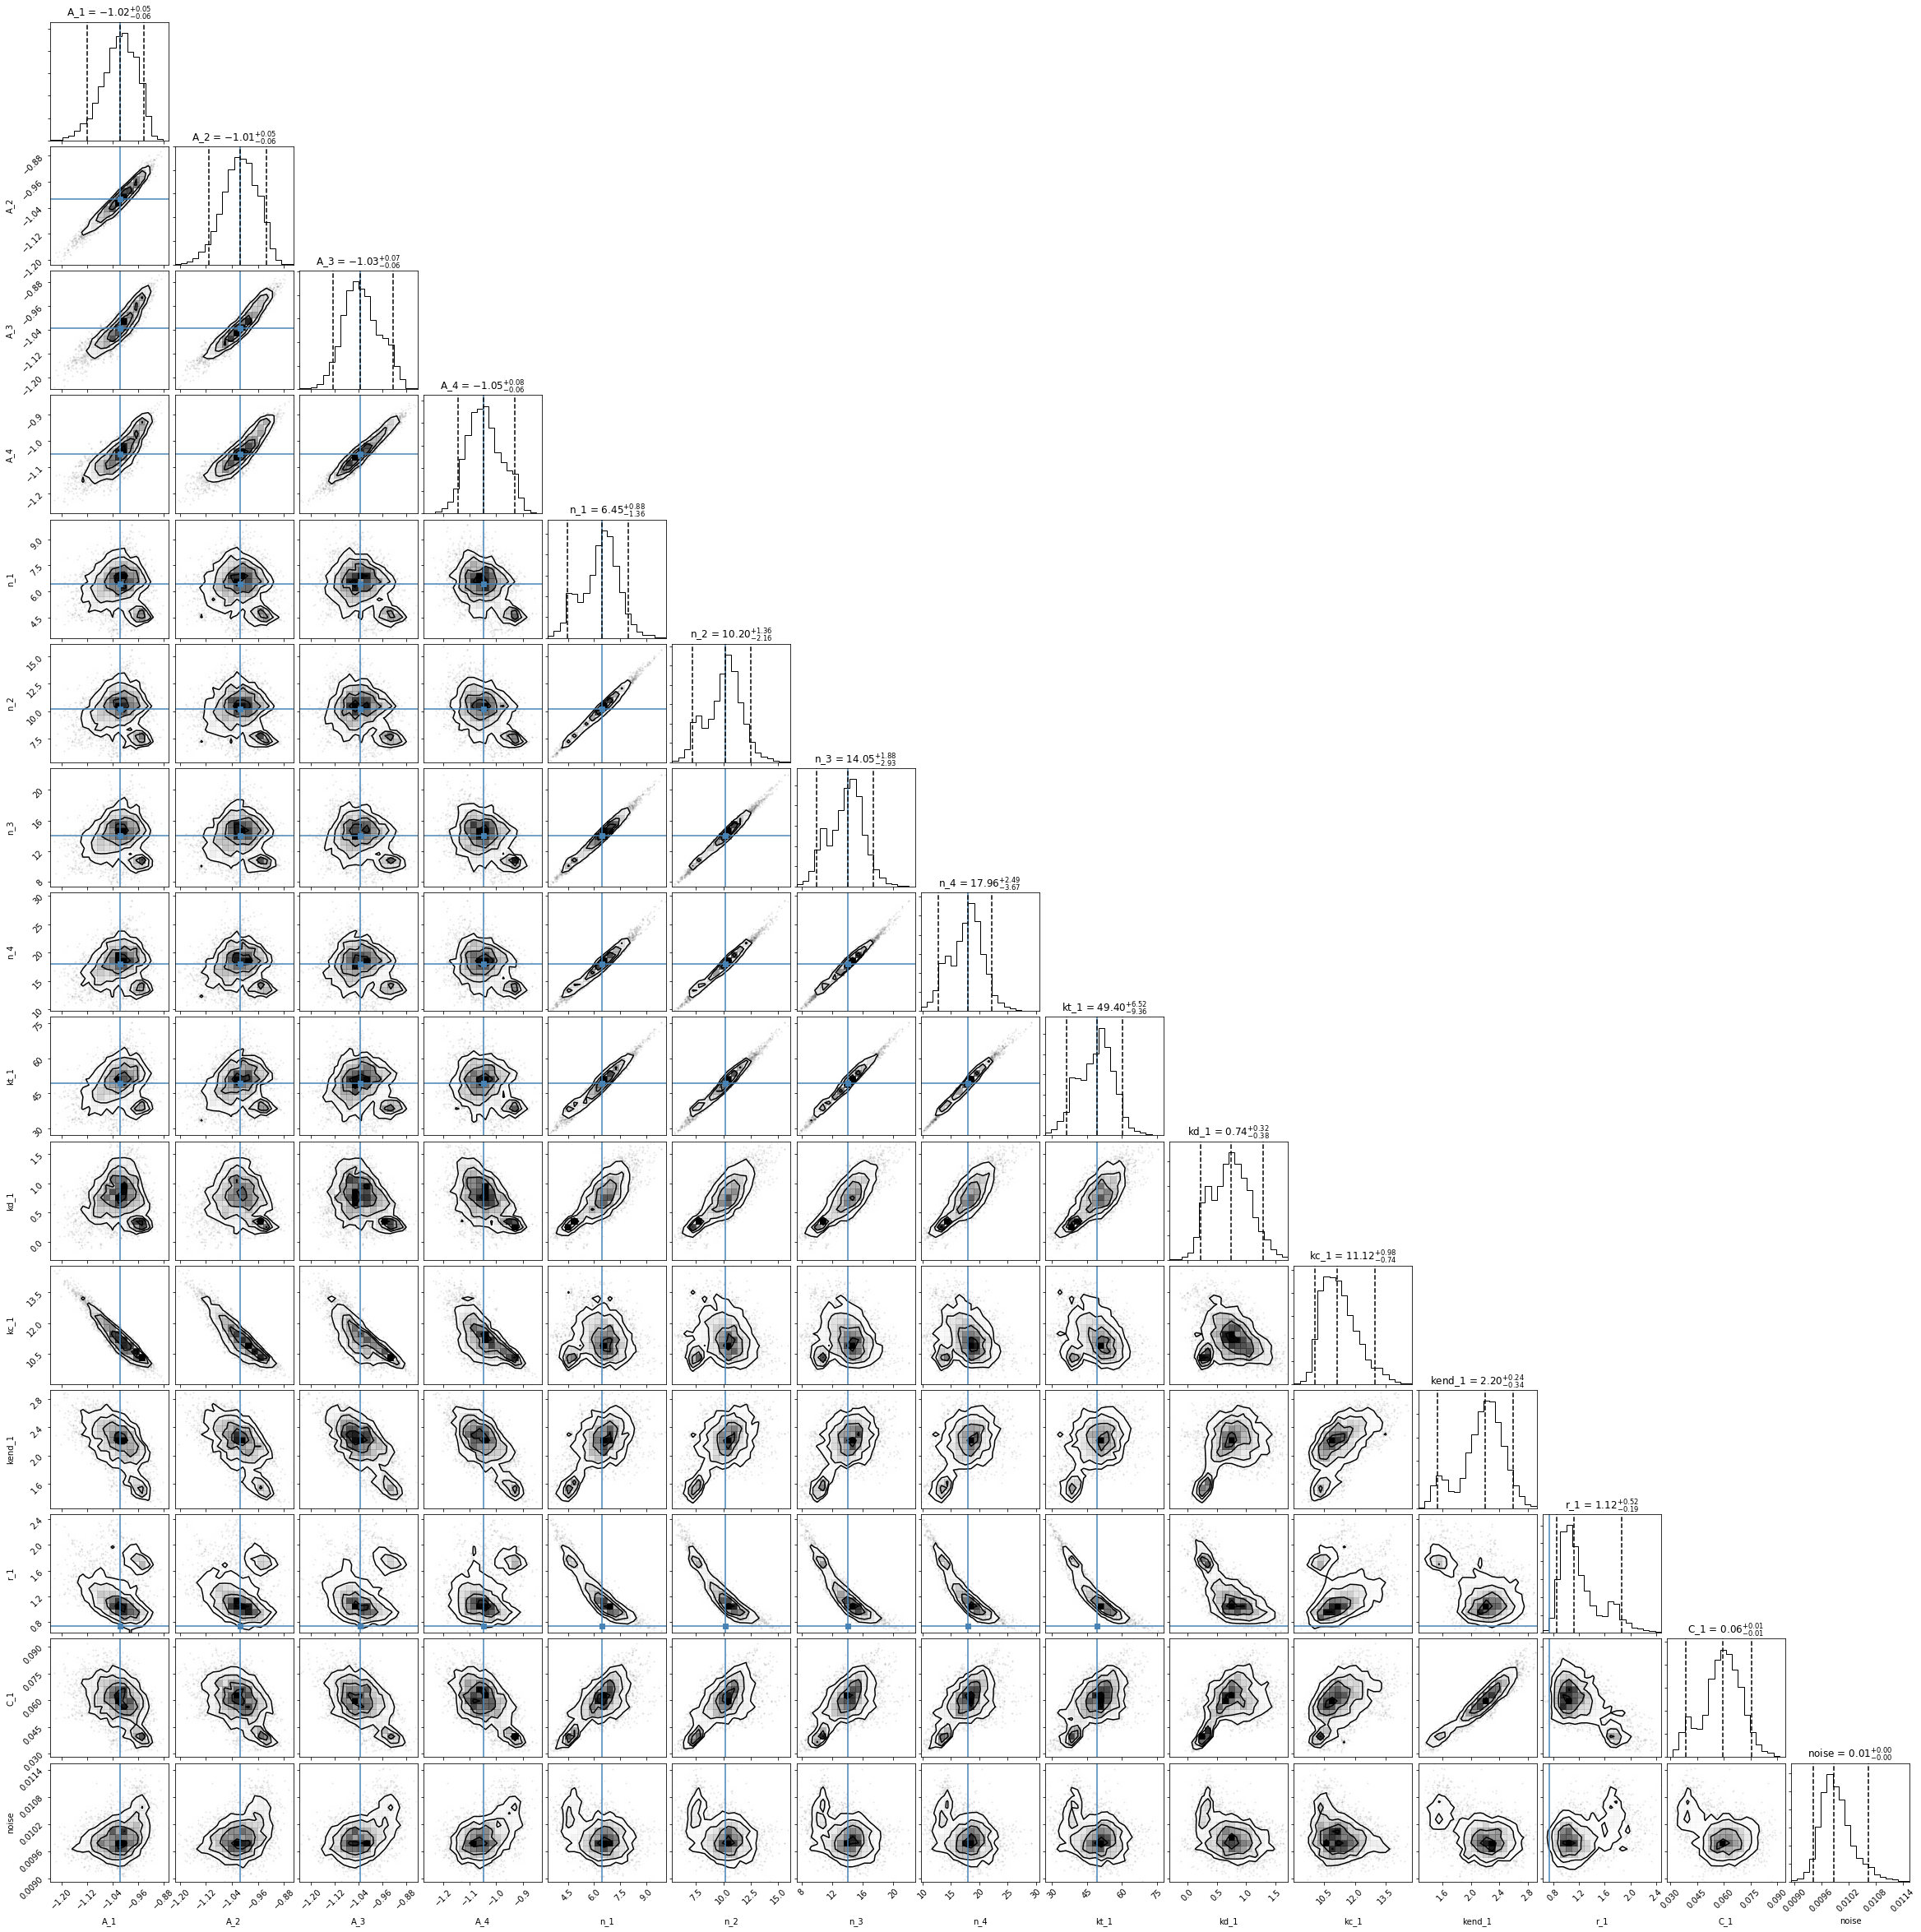

In [65]:
float_all.emcee()